In [2]:
import numpy as np
import matplotlib.pyplot as p

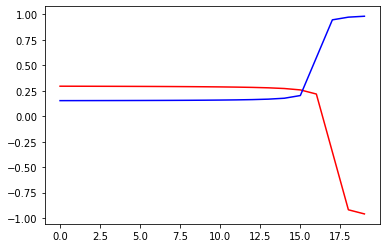

In [43]:
nP = 17
nW = 4
kCore = 1.0
kEdge = .15

N = 20
x = np.linspace(0, N - 1, N)

nT = nP - 1
nS = nW / 2.

kAni1 = [
    (
        (
            np.arctan(
                (10. / nS) * (1. - (i - nT))
            ) + (np.pi / 2.)
        ) * (2. / np.pi) * (kCore / 2. + kEdge)
    ) - 1.
    for i in x
]

foo = kCore
kCore = kEdge
kEdge = foo

kAni2 = [
    (np.arctan(
        10. / nS * (i - nT))
    + (np.pi / 2.)) *
    (1. / np.pi) * (kEdge - kCore) + kCore
    for i in x
]

p.plot(x, kAni1, c='r')
p.plot(x, kAni2, c='b')

In [5]:
import os
os.getcwd()

from scipy import interpolate

In [3]:
kAni2 = np.loadtxt(
    '/Users/pha/Documents/git/bolometer_mfr/output/phantom/' +
    'pos_mesh_x5.75_y0.0_mx1.0e+06/tN4_30x20x75_1.3/' + 
    'phan_aniM4_0.50_10.0_nT15_nW1_nigs1_tN4_30x20x75_1.3__kani_profile.dat')

kAni1 = np.loadtxt(
    '/Users/pha/Documents/git/bolometer_mfr/output/phantom/' + 
    'sym_R1.1_m5_mx1.0e+06/sN8_30x20x150_1.3/' +
    'phan_aniM4_20.0_4.00_nT15_nW2_nigs1_sN8_30x20x150_1.3__kani_profile.dat')

In [9]:
len(kAni1[:20])

20

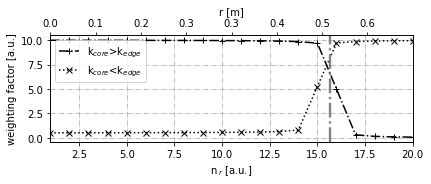

In [26]:
fig, ax = p.subplots()
ax2 = ax.twiny()
ax_ticks = np.array(
    [.0, 2.5, 5., 7.5, 10., 12.5, 15., 17.5]
)

ax.set_xlim(1, 20.)
ax.set_xlabel('n$\,_{r}$ [a.u.]')
ax.set_ylabel('weighting factor [a.u.]')

fig.set_size_inches(6., 2.5)
fig.tight_layout()
fig.savefig('20181010_032_0920_023_cIII_contour.pdf', dpi=169.)

x = range(1, 21)
ax.grid(visible=True, which='major', linestyle='-.')
ax.plot(x, kAni1[20:] / 2. - 1.5, marker='+', c='k', ls='-.',
        label='k$_{core}$>k$_{edge}$')
ax.plot(x, kAni2[20:], c='k', marker='x', ls=':',
        label='k$_{core}$<k$_{edge}$')
ax.legend()

ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax_ticks)

f = interpolate.interp1d(np.linspace(0, 19, 20), kAni1[:20])
fInv = interpolate.interp1d(kAni1[:20], np.linspace(0, 19, 20))

ax2.axvline(fInv(0.5315), c='grey', ls='-.', lw=2.3)
ax2.set_xticklabels(["%.1f" % x for x in f(ax_ticks)])
ax2.set_xlabel('r [m]')

fig.savefig(
    '/Users/pha/Documents/git/latex/THESIS/content/figures/chapter4/' +
    'kAni_profile_comparison.pdf')


In [54]:
len(kAni1)

40